In [79]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import matplotlib
import math

# 1 Apprentissage des paramètres d’un modèle à partir de données

## Question 1.1.1

Grace a la séquence d'observation et la formule suivante: $p(x|y)=P(X_i|X_{i-1})$ on peut déduire la Matrice de transition suivante:

$$\begin{matrix}
& S & I & R \\
S & \frac{2}{3} & \frac{1}{3} & 0 \\
I & 0 & \frac{5}{6} & \frac{1}{6} \\
R & 0 & 0 & 1
\end{matrix}$$




## Question 1.2.1

In [80]:
#lire les données
data = np.loadtxt('data_exo_2022.txt',dtype=int)

## Question 1.2.2

In [81]:
matrice_transitions = np.zeros((3,3))

#Compte le nombre de transitions entre chaque états
for individu in data :
    for i in range(0, len(individu) - 1) :
        matrice_transitions[individu[i]][individu[i + 1]] += 1

#Calcule la probabilité de transition entre les états
for l in range(0, len(matrice_transitions)) :
    somme_ligne = sum(matrice_transitions[l])
    for c in range(0, len(matrice_transitions[l])) :
        matrice_transitions[l][c] = matrice_transitions[l][c] / somme_ligne

print(matrice_transitions)

TypeError: 'float' object is not callable

# 2 Description du premier modèle

## Question 2.1.1

A partir du graphe de transition, la matrice de transition A est la suivante:
$$\begin{matrix}
 & S & I & R \\
S & 0.92 & 0.08 & 0 \\
I & 0 & 0.93 & 0.07 \\
R & 0 & 0 & 1 
\end{matrix}$$

In [82]:
def verifie_matrice_stochastique(matrix):
  # si matrice n'est pas carre
  if matrix.shape[0] != matrix.shape[1]:
    return False
  if not np.all(matrix >= 0):
    return False
#check si somme = 1
  for i in range(matrix.shape[0]):
    if (np.sum(matrix[i, :]) -1)>1e-10:
        return False       
  
  return True

print(verifie_matrice_stochastique(matrice_transitions))

False


## Question 2.1.2

D'apres l'énoncé,au temps t = 0, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté.

On a donc le vecteur de distribution initiale suivant: $\pi_0 = (0.9, 0.1, 0)$

## Distribution $π_t$

## Question 1

On suppose que la chaîne de Markov est homogène. On a donc:\
$\pi_t$ = $\pi_{t-1} * A$\
\
$\pi_1 = \pi_0 * A = (0.828, 0.165, 0.007)$

## Question 2

$\pi_2 = \pi_1 * A = (0.76176, 0.21969, 0.01855)$


## Question 3

$\pi_{t+1} = \pi_t * A$

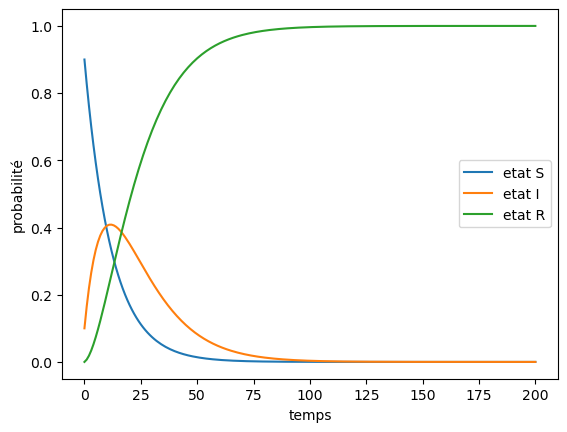

In [83]:
pi_0 = np.array([0.9, 0.1, 0])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0, 0, 1]])
pi_liste = [pi_0]

for i in range(0, 200):
    pi_0 = np.dot(pi_0, A)
    pi_liste.append(pi_0)
    
pi_0 = np.array([0.9, 0.1, 0])
plt.plot(pi_liste)
plt.legend(('etat S','etat I','etat R'))
plt.xlabel('temps')
plt.ylabel('probabilité')
plt.show()

D'après le graphique, on voit que le nombre de personnes infectées atteint un maximum à environ 10 jours. A 100 jours, la probabilité d'être guéri tend vers 1 (donc tout le monde est guéri), et la probabilité d'être infecté ou sain tend vers 0 (donc personne n'est infecté).

## Tirage aléatoire des états

In [12]:
def genere_seq_alea(matrice,pi_0,T):
    t0 = rd.random()
    if t0 < pi_0[0] :
        t0 = 0
    else:
        t0 = 1
    sequence=[t0]
    
    for i in range(1,T):
        etat_precedent=sequence[i-1]
        proba=matrice[etat_precedent]
        etat_present=rd.random()
        
        if etat_present < proba[0]:
            sequence.append(0)
        elif etat_present < proba[0] + proba[1]:
            sequence.append(1)
        else:
            sequence.append(2)
            
    return sequence

In [13]:
etats={0:"S",1:"I",2:"R"}
sequence = genere_seq_alea(A,pi_0,150)
print(sequence)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [14]:
def compter_population(matrice,pi_0,T,nbrIndividu,afficher=True,graphe=True,retourner=True):
    """
    affiche le nombre et le pourcentage d'individu de
    chaque etat de chaque jour
    """
    liste_seq=[]
    for i in range(nbrIndividu):
        liste_seq.append(genere_seq_alea(matrice,pi_0,T))
    liste_nb_etat=[]
    for i in range(T):
        temps_i=[0,0,0]
        for j in range(nbrIndividu):
            etat_personnej=liste_seq[j][i]
            temps_i[etat_personnej]+=1
        if afficher:
            print("À " + str(i) + " jours: \n")
            print("Nombre d'individu sains: " + str(temps_i[0]) + ", Pourcentage de population sains: " + str(temps_i[0]/nbrIndividu*100) + "%")
            print("Nombre d'individu infectés: " + str(temps_i[1])+ ", Pourcentage de population infectés: " + str(temps_i[1]/nbrIndividu*100)+"%")
            print("Nombre d'individu guéris: " + str(temps_i[2]) + ", Pourcentage de population guéris: " + str(temps_i[2]/nbrIndividu*100)+"%")
            print("")
        liste_nb_etat.append(temps_i)
    if graphe:
        plt.plot(liste_nb_etat)
        plt.legend(('etat S','etat I','etat R'))
        plt.xlabel('temps')
        plt.ylabel("nombre d\'individu")
        plt.title("Distribution d\'une population de "+ str(nbrIndividu) + " individus dans " + str(T) + " jours")
        plt.show()
    if retourner:
        return liste_seq

À 0 jours: 

Nombre d'individu sains: 179, Pourcentage de population sains: 89.5%
Nombre d'individu infectés: 21, Pourcentage de population infectés: 10.5%
Nombre d'individu guéris: 0, Pourcentage de population guéris: 0.0%

À 1 jours: 

Nombre d'individu sains: 168, Pourcentage de population sains: 84.0%
Nombre d'individu infectés: 31, Pourcentage de population infectés: 15.5%
Nombre d'individu guéris: 1, Pourcentage de population guéris: 0.5%

À 2 jours: 

Nombre d'individu sains: 153, Pourcentage de population sains: 76.5%
Nombre d'individu infectés: 44, Pourcentage de population infectés: 22.0%
Nombre d'individu guéris: 3, Pourcentage de population guéris: 1.5%

À 3 jours: 

Nombre d'individu sains: 148, Pourcentage de population sains: 74.0%
Nombre d'individu infectés: 45, Pourcentage de population infectés: 22.5%
Nombre d'individu guéris: 7, Pourcentage de population guéris: 3.5000000000000004%

À 4 jours: 

Nombre d'individu sains: 128, Pourcentage de population sains: 64.0%
Nom

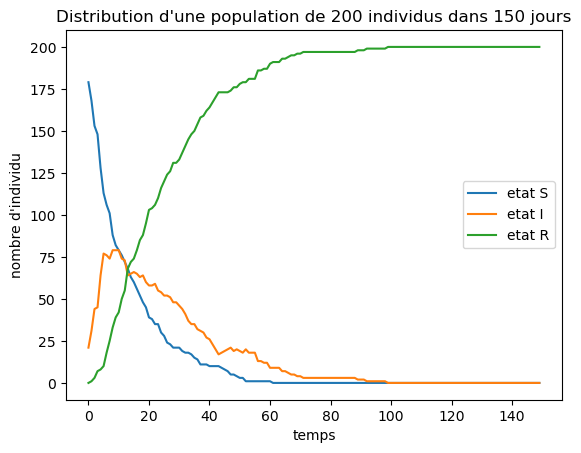

In [15]:
compter_population(A,pi_0,150,200,True,True,False)

On peut voir qu'à partir de 80 jours, le nombre d'individus sains est à 0. A 118 jours, le nombre d'individus infectés est à 0 et le nombre d'individus guéris est à 100%. On peut déduire que quand t est grand, tout les individus auront tendance à être gueri.

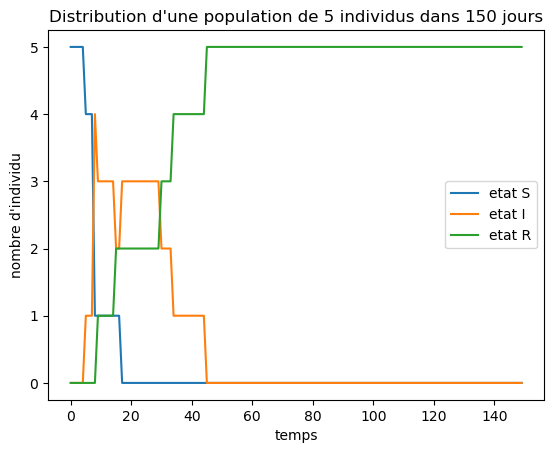

In [16]:
compter_population(A,pi_0,150,5,False,True,False)

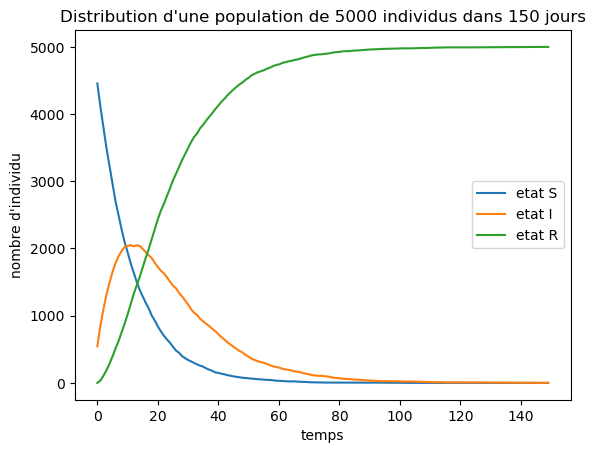

In [17]:
compter_population(A,pi_0,150,5000,False,True,False)

On peut tirer la même conclusion vu précédement avec n'importe quel nombre d'individu. On voit aussi que plus le nombre d'individus augmente, plus on se rapproche de la répartition théorique des effectifs.

## Longueur de l’infection

## Question 1

In [18]:
def longueur_moyenne_infection(matrice,pi_0,T,nbrIndividu):
    """
    Retourne la longueur moyenne d'une sequence d'individu infectés
    """
    list_seq=compter_population(matrice,pi_0,T,nbrIndividu,False,False,True)
    s = 0
    moy=0
    for etat in list_seq:
        s += etat.count(1)
    moyenne=s/len(list_seq)
    
    return moyenne

In [19]:
longueur_moyenne_infection(A,pi_0,150,1000)

14.764

## Question 2

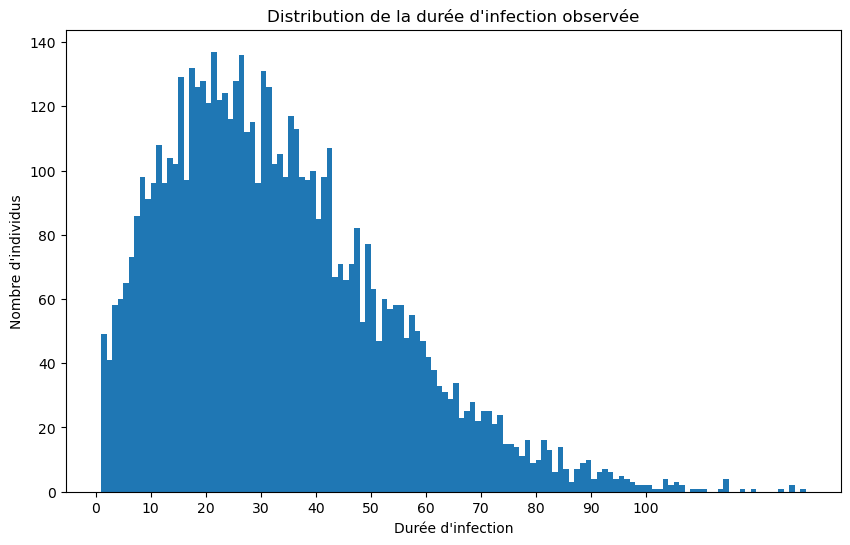

In [78]:
temps_inf = []
liste_seq = compter_population(A,pi_0,150,6000,False,False,True)
for etat in liste_seq :
    temps_inf.append(etat.count(1))
    

hist, bins = np.histogram(temps_inf, bins=np.arange(min(temps_inf), max(temps_inf)+ 1, 1))

plt.figure(figsize=(10, 6))

plt.bar(bins[:-1], hist, width=1, align='edge')

plt.xticks(np.arange(0, 101, step=10))

plt.title("Distribution de la durée d'infection observée")
plt.xlabel("Durée d'infection")
plt.ylabel("Nombre d'individus")

plt.show() 

## Question 3

La moyenne de longueur théorique d’une séquence de I est égale à l'espérance de $X$. Puisque $X$ suit la loi géométrique, on a $E(X)=\frac{1}{P}$.\
\
On sait que la probabilité $P = P(guéri | infecté) = 0.07$ \
Donc la longueur théorique d’une séquence de $I = \frac{1}{0.07} = 14.286$

## Question 4

In [77]:
def infection_theorique(T,p,nbrIndividu):
    prob_tmp_inf = []
    t=1
    for temps in range(1,T):
        t=(1-p) ** temps * p
        prob_tmp_inf.append(t*nbrIndividu)
    return prob_tmp_inf    

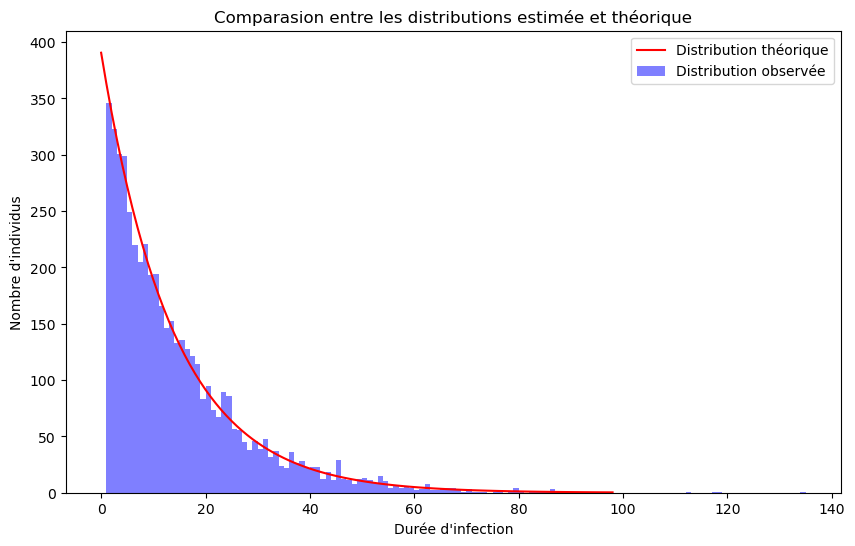

In [76]:
prob_tmp_inf=infection_theorique(100,0.07,6000)
hist, bins = np.histogram(temps_inf, bins=np.arange(min(temps_inf), max(temps_inf)+ 1, 1))

plt.figure(figsize=(10, 6))

plt.plot(prob_tmp_inf, color='red', label='Distribution théorique')

plt.bar(bins[:-1], hist, width=1, align='edge', color='blue', alpha=0.5, label='Distribution observée')

plt.title("Comparasion entre les distributions estimée et théorique")
plt.xlabel("Durée d'infection")
plt.ylabel("Nombre d'individus")

plt.legend()

plt.show()

## Petites modifications autour de ce premier modèle

## Question 1
### Variation de la taille de la population

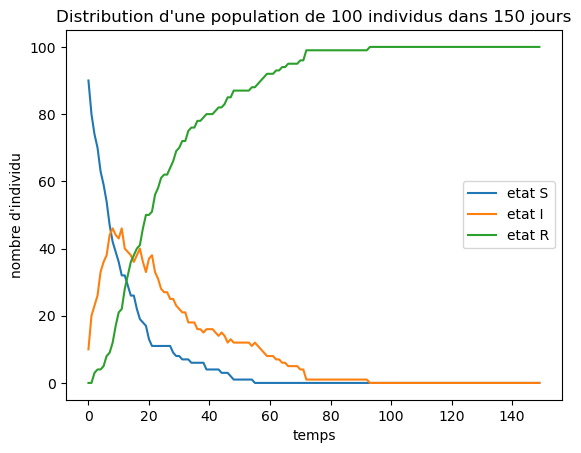

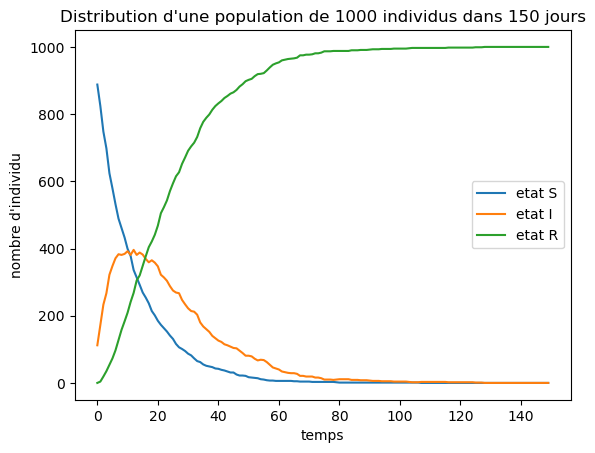

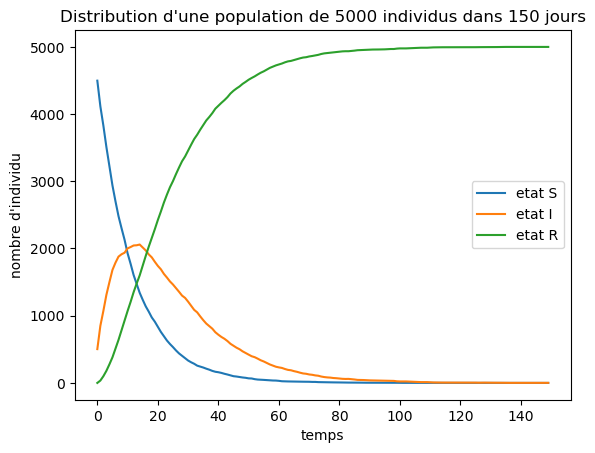

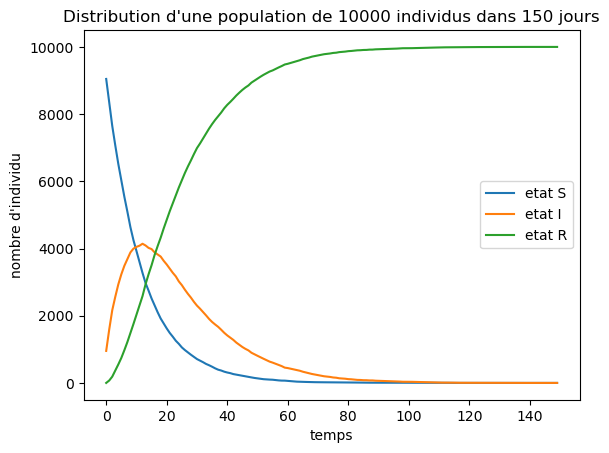

In [23]:
compter_population(A,pi_0,150,100,False,True,False)
compter_population(A,pi_0,150,1000,False,True,False)
compter_population(A,pi_0,150,5000,False,True,False)
compter_population(A,pi_0,150,10000,False,True,False)

D'après nos graphes, on voit que la taille d'une population influe bien sur le nombre d'individus sains, infectés et guéris.Cependant elle n'afflue pas la proportion de ces catégories. On voit plus ou moins les mêmes tendances pour les trois courbes dans chaque graphe.

## Question 2
### la distribution de probabilité initiale

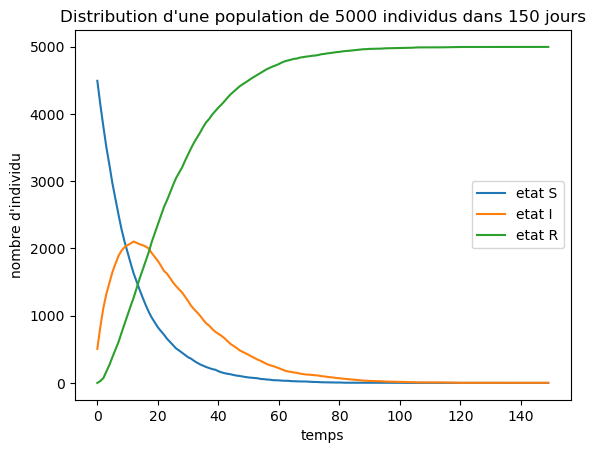

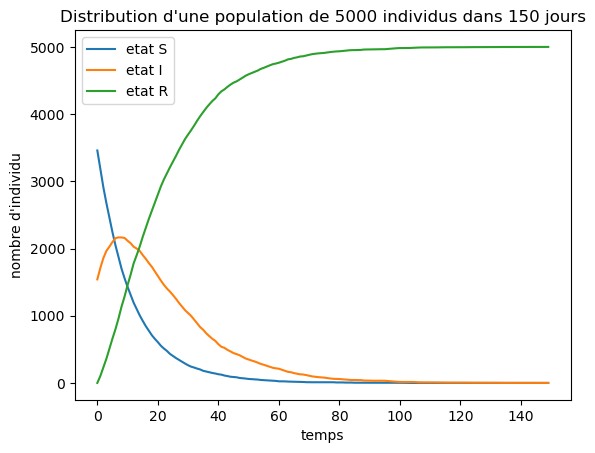

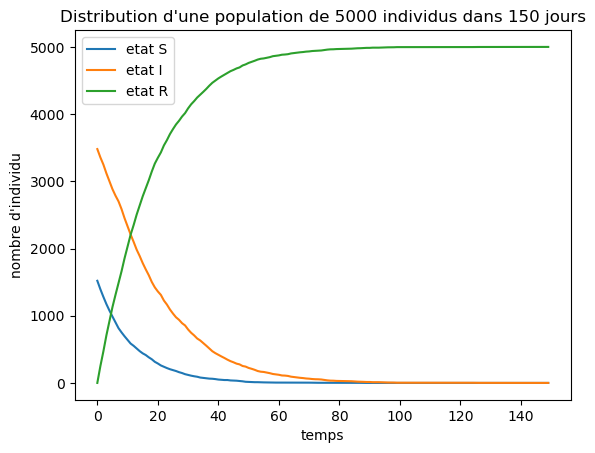

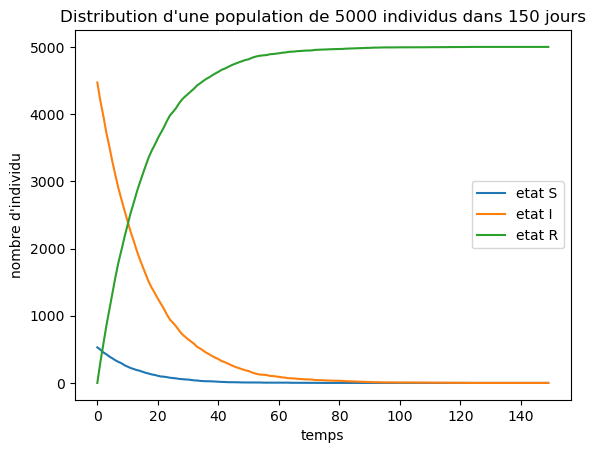

In [24]:
pi1_0=[0.9, 0.1, 0]
pi2_0=[0.7, 0.3, 0]
pi3_0=[0.3, 0.7, 0]
pi4_0=[0.1, 0.9, 0]

compter_population(A,pi1_0,150,5000,False,True,False)
compter_population(A,pi2_0,150,5000,False,True,False)
compter_population(A,pi3_0,150,5000,False,True,False)
compter_population(A,pi4_0,150,5000,False,True,False)

D'après nos graphes, on remarque que la probabilité initiale a bien un afflue sur le nombre ainsi que la proportion d'individus, sains, infectés et gueris. Plus la probabilité d'être infecté augmente à $t=0$, plus le nombre d'infecté augmente et la probabilité d'être sain diminue. On a donc aussi une diminution du nombre d'individus sains.

## Question 3
### les probabilités de transition

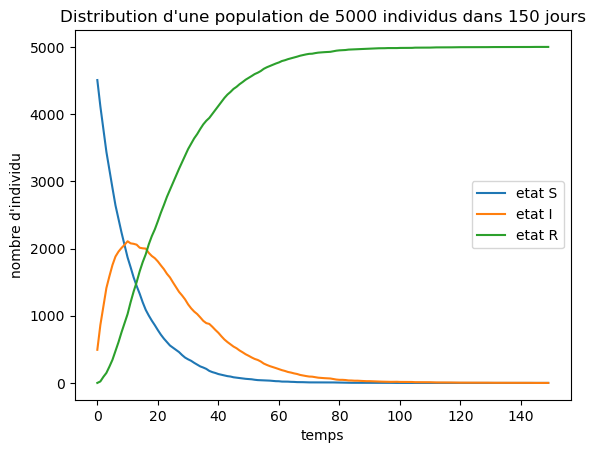

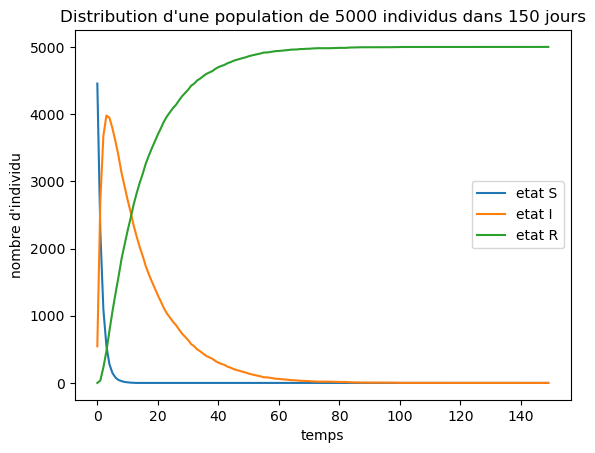

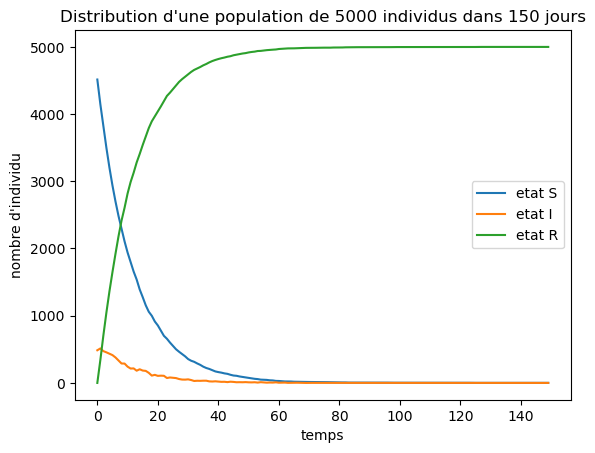

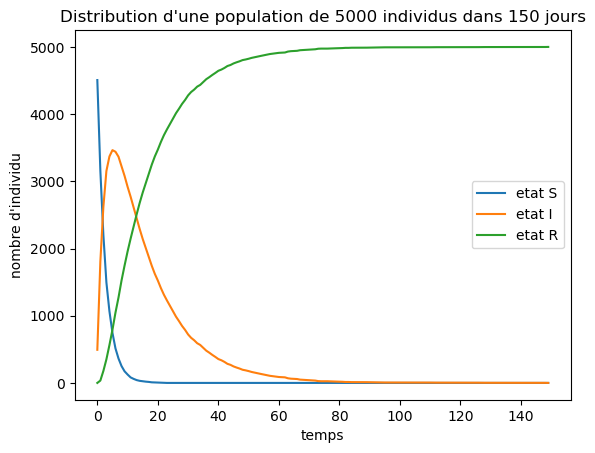

In [25]:
pi_0 = np.array([0.9,0.1,0])

#Matrice de transition de notre modèle
A = np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])

#la probabilité d'être infecté en étant sain est de 1/2
B = np.array([[0.5, 0.5, 0], [0, 0.93, 0.07], [0, 0, 1]])

#la probabilité d'être guéri en étant infecté est augmenté par rapport â notre modèle
C = np.array([[0.92, 0.08, 0], [0, 0.3, 0.7], [0, 0, 1]])

#la probabilité d'être infecté en étant sain est augmenté par rapport â notre modèle
D = np.array([[0.7, 0.3, 0], [0, 0.93, 0.07], [0, 0, 1]])

compter_population(A,pi_0,150,5000,False,True,False)
compter_population(B,pi_0,150,5000,False,True,False)
compter_population(C,pi_0,150,5000,False,True,False)
compter_population(D,pi_0,150,5000,False,True,False)

# 3 Description du second modele


## 1 Analyse du modele


### Question 1


Ce processus peut effectivement etre modelise par une chaine de markov car le processus est homogene, on a un nombre d'états fini et état t+1 depend que de t.


### Question 2



$$\begin{matrix}
& S & I & R \\
S & 0.92 & 0.08 & 0 \\
I & 0 & 0.93 & 0.07 \\
R & 0.02 & 0 & 0.98
\end{matrix}$$



### Question 3

Ce modèle n'est pas périodique, mais irréductible

### Question 4

la matrice AxA correspond a une matrice de transition au temps t+2

In [26]:
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
A2= np.dot(A,A)
#print(A2)
print("Est elle stochastique?", verifie_matrice_stochastique(A2))

Est elle stochastique? True


la matrice $A^3$ correspond a une matrice de transition au temps t+3



In [27]:

A3= np.dot(A,A2)
#print(A3)
print("Est elle stochastique?", verifie_matrice_stochastique(A3))

Est elle stochastique? True


la matrice $A^4$ correspond a une matrice de transition au temps t+4

In [28]:
A4= np.dot(A,A3)
#print(A4)
print("Est elle stochastique?", verifie_matrice_stochastique(A4))

Est elle stochastique? True


### Question 5

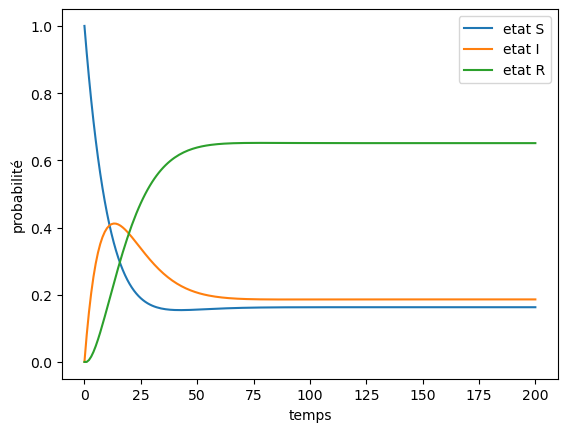

In [29]:
pi_0 = np.array([1, 0, 0])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi_0]

for i in range(0, 200):
    pi_0 = np.dot(pi_0, A)
    pi_liste.append(pi_0)
    
plt.plot(pi_liste)
plt.legend(('etat S','etat I','etat R'))
plt.xlabel('temps')
plt.ylabel('probabilité')
plt.show()

#### REMARQUES:

### Question 6

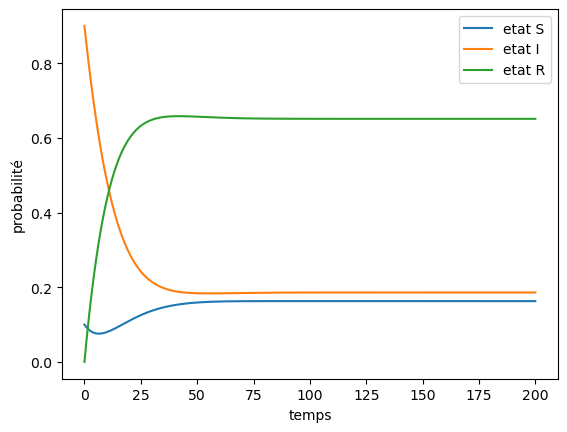

In [30]:
pi_0 = np.array([0.1, 0.9, 0])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi_0]

for i in range(0, 200):
    pi_0 = np.dot(pi_0, A)
    pi_liste.append(pi_0)
    
plt.plot(pi_liste)
plt.legend(('etat S','etat I','etat R'))
plt.xlabel('temps')
plt.ylabel('probabilité')
plt.show()

#### REMARQUES

#### 1-60 % sains et 40 % gueris


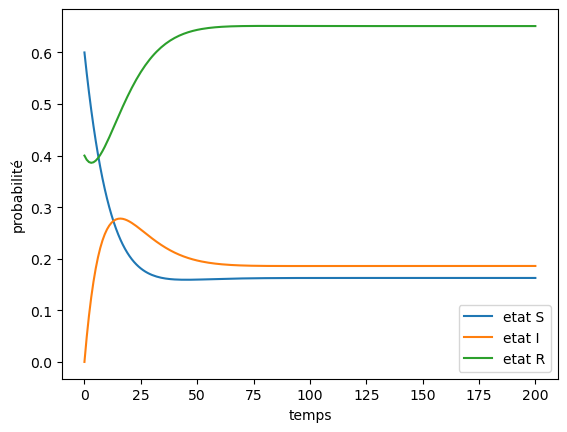

In [31]:
pi_0 = np.array([0.6, 0, 0.4])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi_0]

for i in range(0, 200):
    pi_0 = np.dot(pi_0, A)
    pi_liste.append(pi_0)
    
plt.plot(pi_liste)
plt.legend(('etat S','etat I','etat R'))
plt.xlabel('temps')
plt.ylabel('probabilité')
plt.show()

#### REMARQUES

### Question 7

La chaine de Markov representee sous dessus est ergodique (ergodique si et seulement si elle est irréductible,
apériodique et récurente positive.
 la distribution de probabilité $(\pi^{(n)})_{n \in N}$, la distribution stationnaire quelque soit $\pi^0$ converge vers $\pi^*$qui vérifie : \
$\pi^* = \pi^* \cdot A$ où A est la matrice de transition \
$\pi^* \cdot 1 = 1$ \
\
On a donc : \
$\pi^* = (a,b,c) = (a,b,c) \cdot A$ \
Ce qui nous donne le système d'équation suivant à résoudre : \
\
$a = 0.92a + 0.02c$ \
$b = 0.08a + 0.93b$ \
$c = 0.07b + 0.98c$ \
$a + b + c = 1$ 


Apres avoir résoud le system on obtient les résultats suivants:

$a = \frac{7}{43}$ \
$b = \frac{8}{43}$ \
$c = \frac{28}{43}$ 

on a donc 16.28% de sains, 18.6% d'infectés et 65.12% de guéris. Cela est effectivement en correlation avec les résultats des simulations

## 2 Longueur de l’immunité


### Question 1

In [87]:
def moy_pop(n) :
    
    res = compter_population(A,pi_0,150,n,False,False,True)
    c = 0
    for e in res :
        c += e.count(2)
    return c / len(res)


In [89]:
print("La longueur moyenne d'une séquence de R est de",moy_pop(6000))

La longueur moyenne d'une séquence de R est de 124.9845


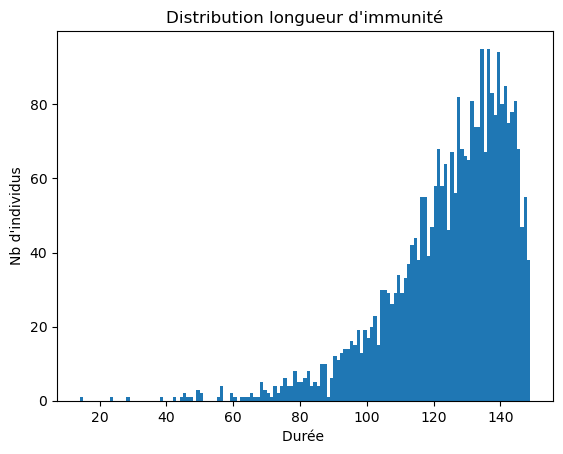

In [90]:
temp = []
l = compter_population(A,pi_0,150,3000,False,False,True)
for e in l :
    temp.append(e.count(2))
    
    
plt.hist(temp, bins=np.arange(min(temp), max(temp) + 1, 1))
plt.title('Distribution longueur d\'immunité')
plt.ylabel("Nb d'individus")
plt.xlabel("Durée ")
plt.show()

### Question 2

Comme la longueur d'immunité semble suivre une loi normale. On peut donc associer l'espérance a la moyenne. On a une moyenne de 85 on peut donc conclure que la longueur d'immunité theorique est 85 jours


### Question 3

In [73]:
def variance_longueur_immunite(n) :
    liste =compter_population(A,pi_0,150,n,False,False,True)
    s = 0
    for e in liste :
        nb_j = e.count(2)
        s += (nb_j - 85)**2
    return s / len(liste)

In [74]:
sum = 0
count = 0
for i in range(1,50) :
	sum += variance_longueur_immunite(2000)
	count += 1
print(sum / count)

925.797530612245


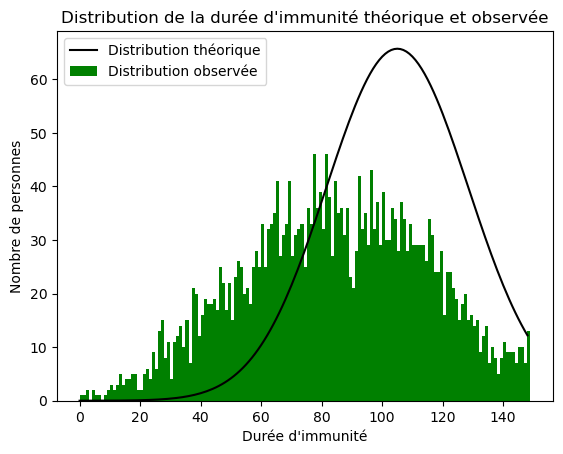

In [75]:
prob = []
ecart_type = math.sqrt(922)
t_i=1
for temps in range(1,150):
    t_i = (1 / (ecart_type * math.sqrt(2 * math.pi))) * math.exp((-1 / (2 * 549)) * (temps - 106)**2)
    prob.append(t_i*5000)

plt.plot(prob, color="black")
plt.hist(temps_immunise, bins=np.arange(min(temps_immunise), max(temps_immunise) + 1, 1),color="green")
plt.xlabel("Durée d'immunité")
plt.ylabel("Nombre de personnes")
plt.title("Distribution de la durée d'immunité théorique et observée")
plt.legend(["Distribution théorique","Distribution observée"])
plt.show()

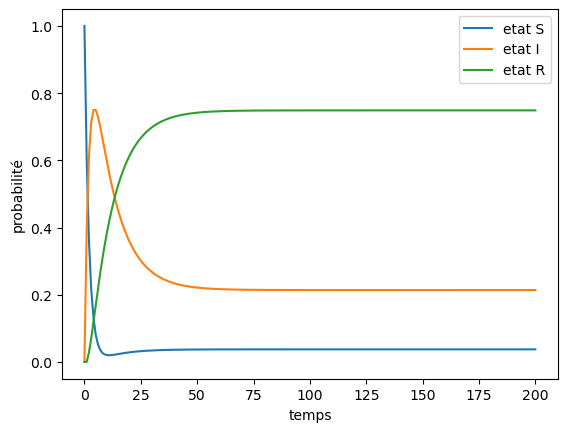

[0.03743315 0.21390375 0.7486631 ]


In [58]:
pi_0 = np.array([1, 0, 0])
A = np.array([[0.6, 0.4, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi_0]

for i in range(0, 200):
    pi_0 = np.dot(pi_0, A)
    pi_liste.append(pi_0)
    
plt.plot(pi_liste)
plt.legend(('etat S','etat I','etat R'))
plt.xlabel('temps')
plt.ylabel('probabilité')
plt.show()
print(pi_liste[-1])

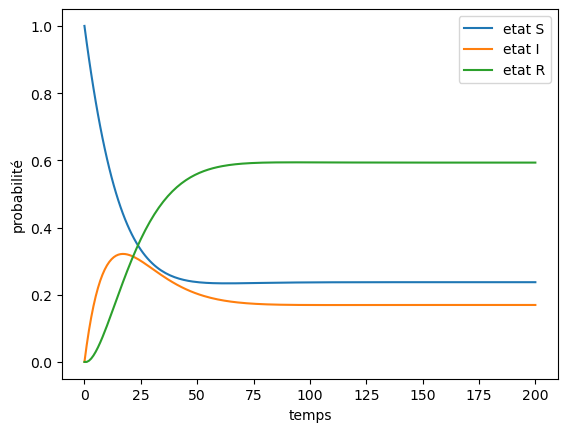

[0.23728854 0.16949177 0.59321969]


In [59]:
pi_0 = np.array([1, 0, 0])
A = np.array([[0.95, 0.05, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi_0]

for i in range(0, 200):
    pi_0 = np.dot(pi_0, A)
    pi_liste.append(pi_0)
    
plt.plot(pi_liste)
plt.legend(('etat S','etat I','etat R'))
plt.xlabel('temps')
plt.ylabel('probabilité')
plt.show()
print(pi_liste[-1])

Lorsque la probabilité pour un individu sain de devenir infecté augmente on constate une forte croissance du taux de personne infectées puis une baisse. les effectifs d'individus sains diminue dès que la distribution s'équilibre, de l'autre coté, l'effectif d'individus guéris et infectés augmente.

# Question 4-Discussion

T= 4 début du confinement numero 1
T= 16: fin du confinement numero: 1
T= 20 début du confinement numero 2
T= 33: fin du confinement numero: 2
T= 38 début du confinement numero 3
T= 52: fin du confinement numero: 3
T= 60 début du confinement numero 4
T= 74: fin du confinement numero: 4
T= 87 début du confinement numero 5
T= 100: fin du confinement numero: 5


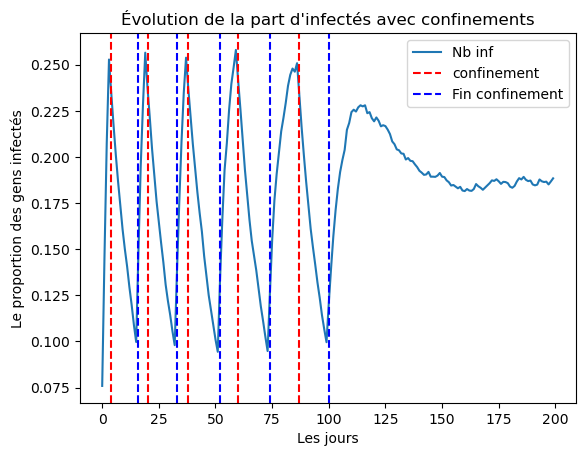

In [99]:
import random
no_confinement = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
avec_confinement = np.array([[1, 0, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
def simulate_infection(population_size, simulation_duration):
    
    etat_ind = [[0] for _ in range(population_size)]  # population sains au debut
    transition_matrix = no_confinement
    infected = 0
    infected_evolution = []
    periode_confi = []
    confi_bool = False

    for t in range(simulation_duration):
        infected_fraction = infected / population_size

        if not confi_bool and infected_fraction >= 0.25:
            # Start restrictions
            periode_confi.append(t)
            transition_matrix = avec_confinement
            confi_bool = True
        elif confi_bool and infected_fraction < 0.1:
            # End restrictions
            periode_confi.append(t)
            transition_matrix = no_confinement
            confi_bool = False

        for i, state in enumerate(etat_ind):
            previous_state = state[-1]
            transition_probabilities = transition_matrix[previous_state]
            new_state = random.choices([0, 1, 2], weights=transition_probabilities)[0]
            etat_ind[i].append(new_state)

            if previous_state != 1 and new_state == 1:
                infected += 1
            elif previous_state == 1 and new_state != 1:
                infected -= 1

        infected_evolution.append(infected / population_size)
        
    plt.plot(infected_evolution)
    plt.title('Évolution de la part d\'infectés avec confinements')
    count = 1
    for t in periode_confi:
        if count % 2 == 1 :
            plt.axvline(x=t, color="red", ls='--') #rouge = début de confinement
            print("T= "+str(t)+" début du confinement numero "+str(count//2 +1))
        else :
            plt.axvline(x=t, color="blue", ls='--') #vert = fin de confinement
            print("T= "+str(t)+": fin du confinement numero: "+str(count//2))
        count += 1
    plt.legend(["Nb inf","confinement","Fin confinement"])
    plt.xlabel("Les jours")
    plt.ylabel("Le proportion des gens infectés")

simulate_infection(10000, 200)
